# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 9</span>


### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

**Alteratively**, we can express a possible path also via a configuration of a $N\times N$ 2D *Ising-like* model with the following bonds:
1. any row must have one and at most one up spin
2. any column must have one and at most one up spin,

all the other spins are down.

We can represent such a configuration with a $N\times N$ matrix whose elements are 1 (spin up) or 0 (spin down); for example, in the case of a TSP with 5 cities:
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0\\
\end{bmatrix}
$$

You can interpret this matrix in the following way:
- column index represents time of visit: first colum = first visit, etc.
- row index represents the ordered sequence of cities: first row = first city, etc.

the previous matrix thus refers to the following sequence:

$$
\vec{x}_1, \vec{x}_2, \vec{x}_3, \vec{x}_4, \vec{x}_5 = 
\vec{c}_{1}, \vec{c}_{3}, \vec{c}_{5}, \vec{c}_{4}, \vec{c}_{2}
$$

and thus to the following *cost* of the path:

$$
L^{(2)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3|^2 + |\vec{c}_3-\vec{c}_5|^2 + |\vec{c}_5-\vec{c}_4|^2 +
|\vec{c}_4-\vec{c}_2|^2 + |\vec{c}_2-\vec{c}_1|^2
$$

or
$$
L^{(1)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3| + |\vec{c}_3-\vec{c}_5| + |\vec{c}_5-\vec{c}_4| +
|\vec{c}_4-\vec{c}_2| + |\vec{c}_2-\vec{c}_1|
$$


Note that, for this *ising-like* representation any particular permutation of the ordered sequence of cities can be obtained by a sequence of multiple pair permutations among rows and/or among columns.

**<span style="color:red">Warm suggestion: by using the 1D representation</span>** (but you can work with the representation you prefer or the one you are able to invent) ...

### Exercise 09.1

Write a C++ code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population, e.g. select the individual $j$ with the algorithm: $j=int(N\times r^p)$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

<span style="color:red">Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</span>

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bods and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!

Apply your code to the optimization of a path among 

- <span style="color:blue">32 cities randomly placed **on** a circumference</span>
- <span style="color:blue">32 cities randomly placed **inside** a square</span>

Show your results via:

- <span style="color:red">a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm</span>
- <span style="color:red">a picture of the best path</span>

### ex
Nella cartella *ex* è presente l'implementazione del codice relativa alla nona esercitazione.  
  
** implementazione del codice **
  
Per implementare l'algoritmo genetico ho costruito una classe $\texttt{Population}$ i cui elementi privati sono:
-  $\texttt{size}$ grandezza della popolazione
- $\texttt{genes}$ quanti geni per singolo cromosoma (il numero di città in questo caso)
- $\texttt{vector<vector<int>>}$ $\texttt{chromosomes}$ il vettore contenente tutta la popolazione, un singolo elemento della popolazione è un cromosoma composto da $\texttt{genes}$ geni
- $\texttt{p}_m$,$\texttt{p}_c$ probabilità di mutazione e di crossover
- $\texttt{father}$,$\texttt{mother}$ indice in cui salvare padre e madre scelti per un possibile crossover
- $\texttt{taglio}$ indice necessario al crossover (posto a metà in questo caso)
  
mentre i metodi principali della classe sono:  
- $\texttt{fill_initial_population}$ questo metodo prende come argomento un cromosoma 0 per poi generare da esso tanti cromosomi quanto è la grandezza della popolazione, utilizzando la funzione shuffle della libreria standard (che mescola gli elementi di un vettore generando quindi una permutazione)   
- $\texttt{mutation}$ metodo che prende come argomento un cromosoma ed effettua su di esso una mutazione (secondo una certa probabilità $\texttt{p}_m$). Ho implementato $4$ diverse mutazioni:  
    - shuffle (stessa funzione citata sopra)
    - semplice scambio di due città adiacenti
    - inversione di percorso scegliendo in modo casuale indice iniziale e finale
    - shift di un numero di elementi, scegliendo in modo casuale quanti elementi shiftare e di quanto
- $\texttt{selection}$ metodo che seleziona padre e madre per il crossover. Come:  
    - ad ogni cromosoma viene associata una probabilità di essere scelto. Tale probabilità l'ho definita come: $p_i = \dfrac{fitness_i}{\sum_k^{size} fitness_k}$ dove $fitness_i = \dfrac{1}{L_i^{(2)}}$
    - si entra in un ciclo infinito
    - viene generato un numero $r$ casuale in modo uniforme in $[0,1]$
    - si sceglie in modo random un elemento $i$ della popolazione e si verifica se $r < p_i$. Se ciò è verificato allora $i$ è un genitore e si esce dal ciclo, altrimenti si continua finche non viene trovato un genitore. (questo intero procedimento è eseguito due volte perchè mi servono due genitori)
- $\texttt{order_chrom}$ ordina in modo decrescente rispetto alla $L^{(2)}$ la mia popolazione di cromosomi
- $\texttt{crossover}$ effettua il crossover (con probabilità $p_c$) generando due nuovi figli
- $\texttt{update}$ se il crossover è avvenuto allora si aggiorna la popolazione:  
    - si aggiungono i figli alla popolazione
    - si ordina la popolazione
    - si eliminano gli ultimi due elementi della popolazione
  
Tutti gli altri metodi, con la loro spiegazione, si trovano nel file relativo all'implementazione del codice  
È stata inoltre implementata una funzione $\texttt{check}$ che controlla se ad ogni mutazione e ad ogni crossover gli elementi generati siano effettivamente permutazioni di $\texttt{(0,1,2,...,31)}$  
  
** esecuzione **  

Struttura del main:  
- all'inizio del main viene definita la parola $\texttt{square}$. Se questa è definita allora si cerca il percorso minimo per città dentro un quadrato, altrimenti città poste su di una circonferenza.  
- il secondo passo è inizializzare un elemento della $\texttt{Population}$ chiamando il costrutture, che prende come argomenti:  
    - $\texttt{size}$
    - $\texttt{genes}$
    - $p_m$
    - $p_c$
- si chiama la funzione $\texttt{fill_initial_population}$ dandogli come argomento il percorso $\texttt{(0,1,2,..,31)}$ e si ordina la popolazione 
- deciso il numero di iterazioni da eseguire si entra in un ciclo $\texttt{for}$:  
    - selezione di padre e madre
    - crossover $+$ possibile mutazione dei figli appena generati
    - update della popolazione
 - usciti dal ciclo si prende il cammino migliore e si salvano i risulati su file per l'analisi  
   
**OSSERVAZIONI**  
durante la simulazione viene misurato il tempo di esecuzione, questo per calcolare nella decima esercitazione l'effettiva efficienza nel parallelizzare il codice.  
Per come ho implementato l'algoritmo ad ogni iterazione si (può succedere con probabilità $p_c$) aggiungono due nuovi elementi, migliori di quelli che erano già presenti. Quindi non avviene un vero e proprio cambio generazionale (non si passa da una vecchia popolazione ad una nuova intera popolazione).  
Questo ha portato prima di tutto alla necessità di aumentare la probabilità di mutazione, questo perchè la possibilità di cadere in un minimo locale è diventata più alta.  
Ovviamente in questo modo alla fine delle iterazioni tutti gli elementi della popolazione saranno identitici (è sopravvissuto effettivamente solo il migliore).  
  
**NOTE**  
- mutazione: quando viene chiamato il metodo mutazione avviene solo un'unica mutazione di quelle elencate sopra  
- come si è potuto intuire ho scelto di rappresentare i cromosomi, cioè i possibili cammini, utilizzando la prima notazione di quelle che ci erano state proposte.  
- come funzione costo ho scelto $L^{(2)}$

## CITIES PLACED ON  A CIRCUMFERENCE

Ho usato una popolazione di $32$ (pari al numero di città) cromosomi e ho compiuto $50'000$ iterazioni  
Nei grafici sono state indicizzate le città, per cui ogni numero rappresenta il nome della città visitata  
probabilità usate:  
- $P_{crossover} = 0.7$
- $P_{mutation} = 0.2$

esecution time:  5.57557  sec


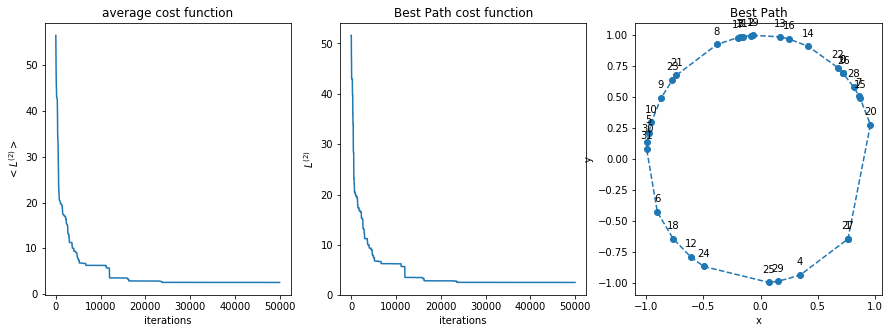

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


folder = "circumference/","square/"
name = "path_average.txt","best_path.txt","picture_path.txt"
ylab = "$<L^{(2)}>$","$L^{(2)}$","y"
title = "average cost function","Best Path cost function","Best Path"

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(15, 5))

for i in range(3):
    if i != 2:
        it = np.loadtxt(folder[0]+name[i],usecols=(0),unpack='true')
        y = np.loadtxt(folder[0]+name[i],usecols=(1),unpack='true')
        axs[i].plot(it,y)
        axs[i].set_xlabel("iterations")
    else:
        x = np.loadtxt(folder[0]+name[i],usecols=(1),unpack='true')
        y = np.loadtxt(folder[0]+name[i],usecols=(2),unpack='true')
        n = np.loadtxt(folder[0]+name[i],dtype='int',usecols=(0),unpack='true')
        axs[i].plot(x,y,"--o")
        axs[i].set_xlabel("x")
        for xs,ys,ns in zip(x,y,n):
            label = f"{ns}"
            plt.annotate(label,(xs,ys),textcoords="offset points",xytext=(0,10),ha='center')
    axs[i].set_ylabel(ylab[i])
    axs[i].set_title(title[i])
    
time = np.loadtxt(folder[0]+"circumference.time",usecols=(0),unpack='true')
print("esecution time: ",time ," sec")
    
plt.show()

## CITIES PLACED INSIDE A SQUARE

Ho usato una popolazione di $32$ (pari al numero di città) cromosomi e ho compiuto $50'000$ iterazioni  
Nei grafici sono state indicizzate le città, per cui ogni numero rappresenta il nome della città visitata  
probabilità usate:  
- $P_{crossover} = 0.7$
- $P_{mutation} = 0.2$

esecution time:  5.60943  sec


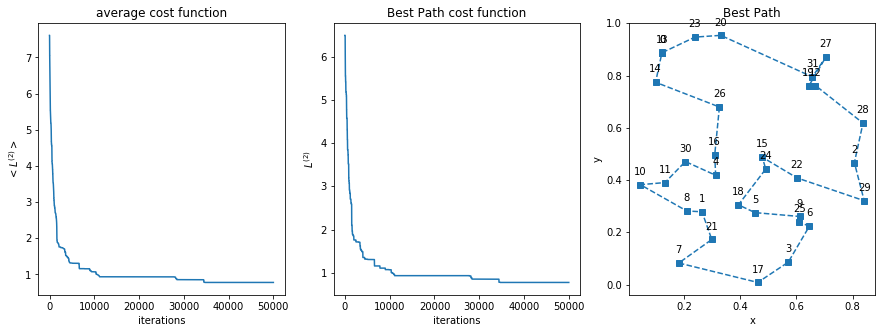

In [2]:
fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(15, 5))

for i in range(3):
    if i != 2:
        it = np.loadtxt(folder[1]+name[i],usecols=(0),unpack='true')
        y = np.loadtxt(folder[1]+name[i],usecols=(1),unpack='true')
        axs[i].plot(it,y)
        axs[i].set_xlabel("iterations")
    else:
        x = np.loadtxt(folder[1]+name[i],usecols=(1),unpack='true')
        y = np.loadtxt(folder[1]+name[i],usecols=(2),unpack='true')
        n = np.loadtxt(folder[1]+name[i],dtype='int',usecols=(0),unpack='true')
        axs[i].plot(x,y,"--s")
        axs[i].set_xlabel("x")
        for xs,ys,ns in zip(x,y,n):
            label = f"{ns}"
            plt.annotate(label,(xs,ys),textcoords="offset points",xytext=(0,10),ha='center')
    axs[i].set_ylabel(ylab[i])
    axs[i].set_title(title[i])
    
time = np.loadtxt(folder[1]+"square.time",usecols=(0),unpack='true')
print("esecution time: ",time ," sec") 

plt.show()

#### COMMENTO 
come mi aspettavo la funzione costo media e la best convergono velocemente a minimi locali fino ad arrivare al minimo (supposto globale e anche verificato con la decima esercitazione) e allo stesso valore per entrambe (cioè tutti gli elementi della popolazione sono uguali).  
Potrei anche non aver trovato il vero minimo..

#### OSSERVAZIONE
La parte più difficile di questo esercizio è stato settare i parametri. Scegliere una popolazione più grande può effettivamente cambiare il risultato e richiede di modificare gli altri parametri a loro volta. La stessa scelta del seme per il generatore random può portare a risultati diversi. Ma questa scelta del seme può essere fortunatamente superata grazie ad una implementazione parallela, come faremo nella prossima esercitazione.  